In [ ]:
#load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#load the dataset into the dataframe
data=pd.read_csv("adult_with_headers.csv")

In [ ]:
data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# Data Exploration and Preprocessing

In [ ]:
data.shape

(32561, 15)

In [ ]:
data.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
# show duplicates
data[data.duplicated(keep=False)]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
2303,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
3917,19,Private,251579,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,14,United-States,<=50K
4325,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
4767,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
4940,38,Private,207202,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,48,United-States,>50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
5579,27,Private,255582,HS-grad,9,Never-married,Machine-op-inspct,Not-in-family,White,Female,0,0,40,United-States,<=50K
5805,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
5842,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K


In [ ]:
# drop duplicate records
data.drop_duplicates(inplace =True)

In [ ]:
# reset index
data.reset_index(drop=True,inplace=True)

In [ ]:
# finding unique values
data.nunique()

,0
age,73
workclass,9
fnlwgt,21648
education,16
education_num,16
marital_status,7
occupation,15
relationship,6
race,5
sex,2


In [ ]:
data['income'].value_counts()

,income
<=50K,24698
>50K,7839


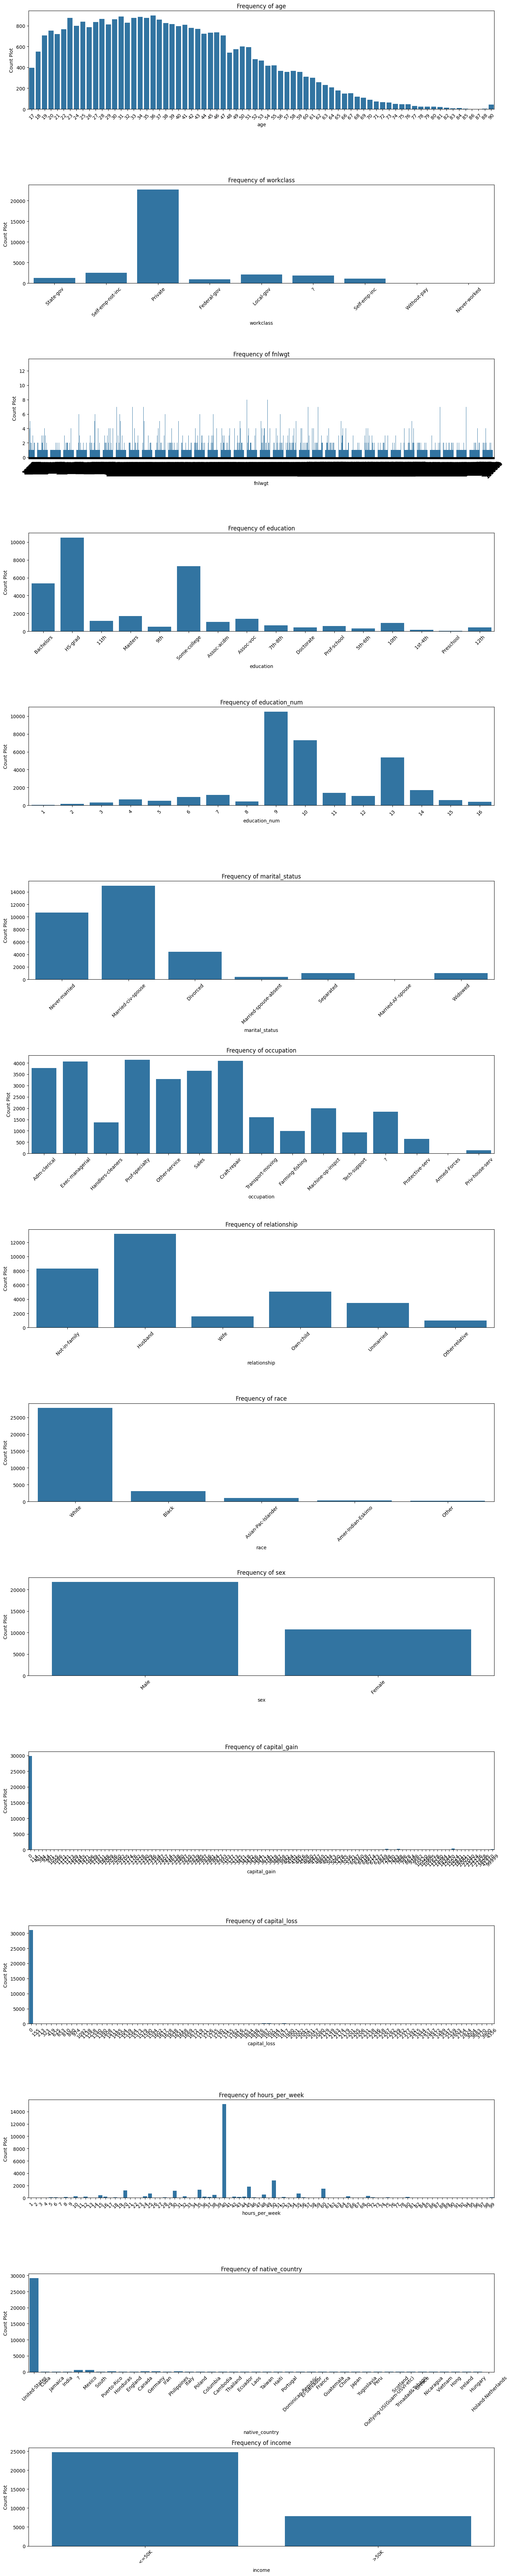

In [ ]:
# Create a single figure with multiple subplots
fig, axes = plt.subplots(len(data.columns), 1, figsize=(15, len(data.columns) * 5))

# Plot count plots for each categorical column
for i, column in enumerate(data.columns):
    sns.countplot(data=data, x=column, ax=axes[i])
    axes[i].set_title(f'Frequency of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count Plot')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

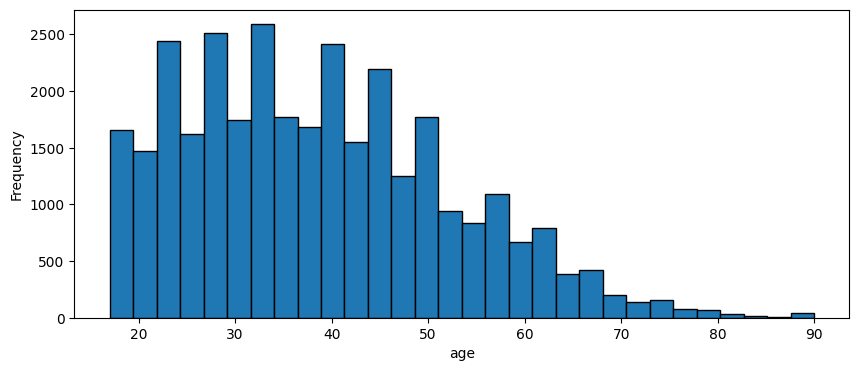

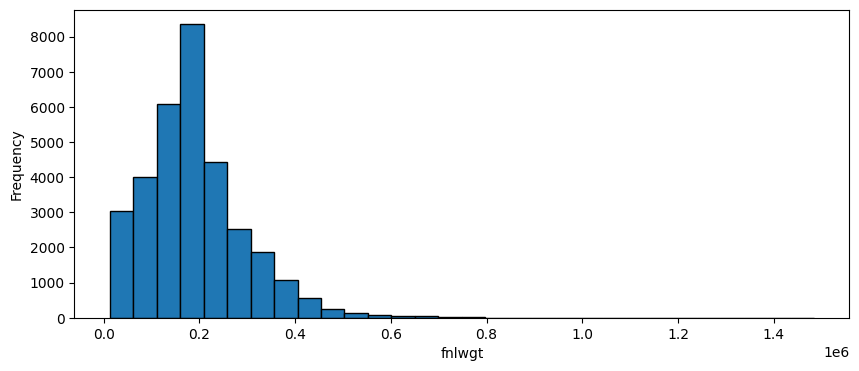

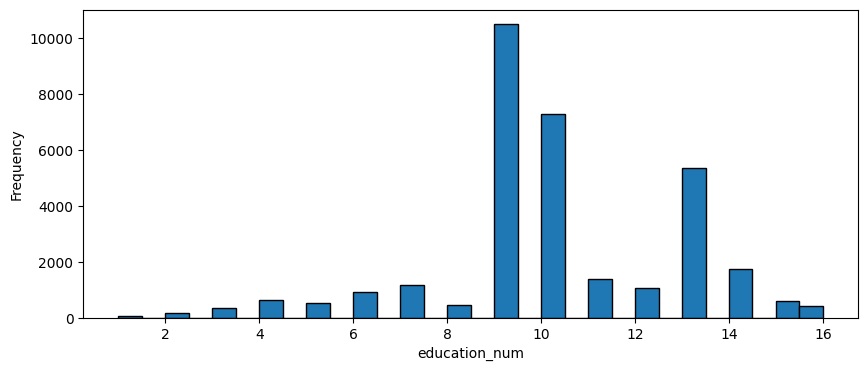

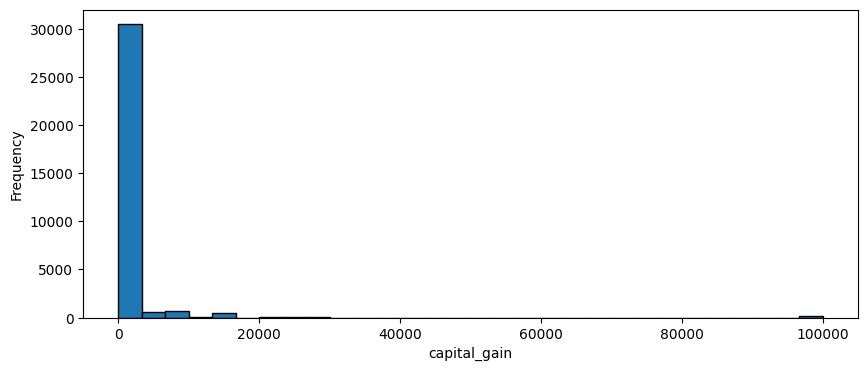

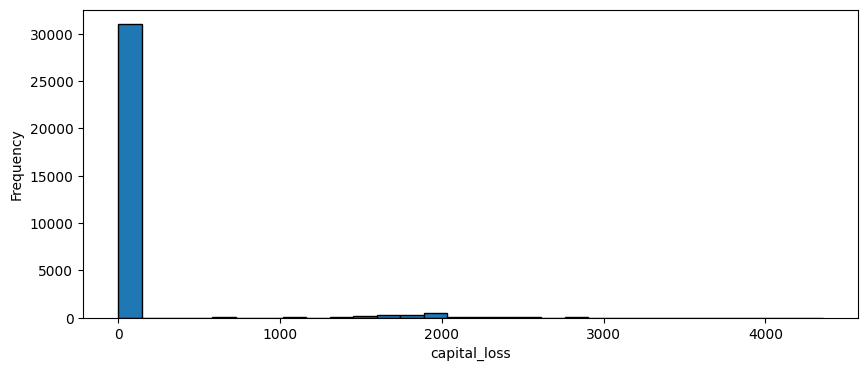

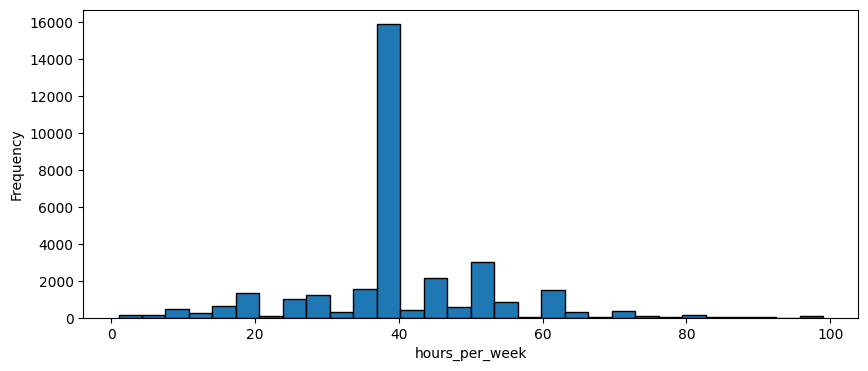

In [ ]:
numerical_columns = data.select_dtypes(include=['number']).columns
for col in numerical_columns:
    plt.figure(figsize=(10, 4))
    plt.hist(data[col], bins=30, edgecolor='k')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
# create copy
New_Data = data


In [ ]:
New_Data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32533,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32534,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32535,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# Standard Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
Scaler = StandardScaler()
Numeric_columns = data.select_dtypes(include=['int64', 'float64'])
data_scaler= Scaler.fit_transform(Numeric_columns)

# Convert the scaled data back to a DataFrame
data_scaler = pd.DataFrame(data_scaler, columns=Numeric_columns.columns, index=data.index)

# Replace the original numerical columns with the scaled data
New_Data[Numeric_columns.columns] = data_scaler
New_Data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.030390,State-gov,-1.063569,Bachelors,1.134777,Never-married,Adm-clerical,Not-in-family,White,Male,0.148292,-0.216743,-0.035664,United-States,<=50K
1,0.836973,Self-emp-not-inc,-1.008668,Bachelors,1.134777,Married-civ-spouse,Exec-managerial,Husband,White,Male,-0.145975,-0.216743,-2.222483,United-States,<=50K
2,-0.042936,Private,0.245040,HS-grad,-0.420679,Divorced,Handlers-cleaners,Not-in-family,White,Male,-0.145975,-0.216743,-0.035664,United-States,<=50K
3,1.056950,Private,0.425752,11th,-1.198407,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,-0.145975,-0.216743,-0.035664,United-States,<=50K
4,-0.776193,Private,1.408066,Bachelors,1.134777,Married-civ-spouse,Prof-specialty,Wife,Black,Female,-0.145975,-0.216743,-0.035664,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,-0.849519,Private,0.639678,Assoc-acdm,0.745913,Married-civ-spouse,Tech-support,Wife,White,Female,-0.145975,-0.216743,-0.197650,United-States,<=50K
32533,0.103716,Private,-0.335436,HS-grad,-0.420679,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,-0.145975,-0.216743,-0.035664,United-States,>50K
32534,1.423579,Private,-0.358779,HS-grad,-0.420679,Widowed,Adm-clerical,Unmarried,White,Female,-0.145975,-0.216743,-0.035664,United-States,<=50K
32535,-1.216148,Private,0.110930,HS-grad,-0.420679,Never-married,Adm-clerical,Own-child,White,Male,-0.145975,-0.216743,-1.655530,United-States,<=50K


# Min-Max Scaling

In [ ]:
Scaler = MinMaxScaler()
Data_scaler = Scaler.fit_transform(Numeric_columns)
# Convert the scaled data back to a DataFrame with the same column names
Data_scaler = pd.DataFrame(Data_scaler, columns=Numeric_columns.columns)
Data_scaler

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.301370,0.044302,0.800000,0.021740,0.0,0.397959
1,0.452055,0.048238,0.800000,0.000000,0.0,0.122449
2,0.287671,0.138113,0.533333,0.000000,0.0,0.397959
3,0.493151,0.151068,0.400000,0.000000,0.0,0.397959
4,0.150685,0.221488,0.800000,0.000000,0.0,0.397959
...,...,...,...,...,...,...
32532,0.136986,0.166404,0.733333,0.000000,0.0,0.377551
32533,0.315068,0.096500,0.533333,0.000000,0.0,0.397959
32534,0.561644,0.094827,0.533333,0.000000,0.0,0.397959
32535,0.068493,0.128499,0.533333,0.000000,0.0,0.193878


# Encoding Techniques

In [ ]:
from sklearn.preprocessing import LabelEncoder


In [ ]:
# Identify categorical columns with less than 5 categories
categorical_columns_less = [col for col in New_Data.select_dtypes(include=['object']).columns if New_Data[col].nunique() < 5]

# Apply One-Hot Encoding
New_Data = pd.get_dummies(New_Data, columns=categorical_columns_less, drop_first=True)

# Identify categorical columns with more than 5 categories in the updated DataFrame
categorical_columns_more = [col for col in New_Data.select_dtypes(include=['object']).columns if New_Data[col].nunique() >= 5]

# Initialize the LabelEncoder
label_encoders = {}

# Apply Label Encoding to these columns
for col in categorical_columns_more:
    le = LabelEncoder()
    # Fit and transform the column data
    New_Data[col] = le.fit_transform(New_Data[col])
    # Save the encoder for inverse transformation if needed
    label_encoders[col] = le
New_Data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Male,income_ >50K
0,0.030390,7,-1.063569,9,1.134777,4,1,1,4,0.148292,-0.216743,-0.035664,39,1,0
1,0.836973,6,-1.008668,9,1.134777,2,4,0,4,-0.145975,-0.216743,-2.222483,39,1,0
2,-0.042936,4,0.245040,11,-0.420679,0,6,1,4,-0.145975,-0.216743,-0.035664,39,1,0
3,1.056950,4,0.425752,1,-1.198407,2,6,0,2,-0.145975,-0.216743,-0.035664,39,1,0
4,-0.776193,4,1.408066,9,1.134777,2,10,5,2,-0.145975,-0.216743,-0.035664,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,-0.849519,4,0.639678,7,0.745913,2,13,5,4,-0.145975,-0.216743,-0.197650,39,0,0
32533,0.103716,4,-0.335436,11,-0.420679,2,7,0,4,-0.145975,-0.216743,-0.035664,39,1,1
32534,1.423579,4,-0.358779,11,-0.420679,6,1,4,4,-0.145975,-0.216743,-0.035664,39,0,0
32535,-1.216148,4,0.110930,11,-0.420679,4,1,3,4,-0.145975,-0.216743,-1.655530,39,1,0


In [ ]:
New_Data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Male,income_ >50K
0,0.030390,7,-1.063569,9,1.134777,4,1,1,4,0.148292,-0.216743,-0.035664,39,1,0
1,0.836973,6,-1.008668,9,1.134777,2,4,0,4,-0.145975,-0.216743,-2.222483,39,1,0
2,-0.042936,4,0.245040,11,-0.420679,0,6,1,4,-0.145975,-0.216743,-0.035664,39,1,0
3,1.056950,4,0.425752,1,-1.198407,2,6,0,2,-0.145975,-0.216743,-0.035664,39,1,0
4,-0.776193,4,1.408066,9,1.134777,2,10,5,2,-0.145975,-0.216743,-0.035664,5,0,0


In [ ]:
# Print unique values and counts for all columns
for col in New_Data.columns:
    print(f"Column: {col}")
    print(New_Data[col].value_counts())
    print()

Column: age
-0.189587    898
-0.556216    888
-0.336239    886
-1.142822    876
-0.409565    875
            ... 
 3.256723      6
 3.623352      3
 3.403374      3
 3.476700      1
 3.550026      1
Name: age, Length: 73, dtype: int64

Column: workclass
4    22673
6     2540
2     2093
0     1836
7     1298
5     1116
1      960
8       14
3        7
Name: workclass, dtype: int64

Column: fnlwgt
-0.242441    13
-0.632561    13
 0.129858    13
-0.386395    12
-0.723954    12
             ..
-0.487319     1
-0.300705     1
 0.407401     1
 1.286461     1
 0.639678     1
Name: fnlwgt, Length: 21648, dtype: int64

Column: education
11    10494
15     7282
9      5353
12     1722
8      1382
1      1175
7      1067
0       933
5       645
14      576
6       514
2       433
10      413
4       332
3       166
13       50
Name: education, dtype: int64

Column: education_num
-0.420679    10494
-0.031815     7282
 1.134777     5353
 1.523641     1722
 0.357049     1382
-1.198407     1175
 0.74

# Feature Engineering

In [ ]:
New_Data['age_income_ratio'] = New_Data['age'] / New_Data['fnlwgt']

In [ ]:
# Handle division by zero
New_Data['capital_gain_loss_ratio'] = np.where(New_Data['capital_loss'] == 0,
                                            New_Data['capital_gain'], New_Data['capital_gain'] / New_Data['capital_loss'])

New_Data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Male,income_ >50K,age_income_ratio,capital_gain_loss_ratio
0,0.030390,7,-1.063569,9,1.134777,4,1,1,4,0.148292,-0.216743,-0.035664,39,1,0,-0.028574,-0.684182
1,0.836973,6,-1.008668,9,1.134777,2,4,0,4,-0.145975,-0.216743,-2.222483,39,1,0,-0.829780,0.673495
2,-0.042936,4,0.245040,11,-0.420679,0,6,1,4,-0.145975,-0.216743,-0.035664,39,1,0,-0.175220,0.673495
3,1.056950,4,0.425752,1,-1.198407,2,6,0,2,-0.145975,-0.216743,-0.035664,39,1,0,2.482552,0.673495
4,-0.776193,4,1.408066,9,1.134777,2,10,5,2,-0.145975,-0.216743,-0.035664,5,0,0,-0.551248,0.673495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,-0.849519,4,0.639678,7,0.745913,2,13,5,4,-0.145975,-0.216743,-0.197650,39,0,0,-1.328041,0.673495
32533,0.103716,4,-0.335436,11,-0.420679,2,7,0,4,-0.145975,-0.216743,-0.035664,39,1,1,-0.309197,0.673495
32534,1.423579,4,-0.358779,11,-0.420679,6,1,4,4,-0.145975,-0.216743,-0.035664,39,0,0,-3.967846,0.673495
32535,-1.216148,4,0.110930,11,-0.420679,4,1,3,4,-0.145975,-0.216743,-1.655530,39,1,0,-10.963245,0.673495


In [ ]:
### transformation skewed numerical feature and justify your choice.
from scipy.stats import skew

# Calculate skewness
Numerical_columns = New_Data.select_dtypes(include=['int64', 'float64'])

# Calculate skewness for numerical columns
skewness = Numerical_columns.apply(lambda x: skew(x))
print(skewness)

age                         0.557637
workclass                  -0.751564
fnlwgt                      1.447636
education                  -0.934117
education_num              -0.309486
marital_status             -0.012752
occupation                  0.114581
relationship                0.786512
race                       -2.435225
capital_gain               11.948852
capital_loss                4.592491
hours_per_week              0.228748
native_country             -3.660959
age_income_ratio           74.278125
capital_gain_loss_ratio   -11.946107
dtype: float64


In [ ]:
# Apply log transformation
New_Data['capital_gain'] = np.log1p(New_Data['capital_gain']) # high skewed
New_Data['capital_loss'] = np.log1p(New_Data['capital_loss'])  # moderate but skewed
New_Data['fnlwgt'] = np.log1p(data['fnlwgt'])      # low skew
New_Data['age_income_ratio'] = np.log1p(New_Data['age_income_ratio'])   # high skew
New_Data['capital_gain_loss_ratio'] = np.log1p(New_Data['capital_gain_loss_ratio'])   # high skewed
New_Data

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Male,income_ >50K,age_income_ratio,capital_gain_loss_ratio
0,0.030390,7,NaN,9,1.134777,4,1,1,4,0.138275,-0.244295,-0.035664,39,1,0,-0.028990,-1.152589
1,0.836973,6,NaN,9,1.134777,2,4,0,4,-0.157795,-0.244295,-2.222483,39,1,0,-1.770665,0.514914
2,-0.042936,4,0.219168,11,-0.420679,0,6,1,4,-0.157795,-0.244295,-0.035664,39,1,0,-0.192638,0.514914
3,1.056950,4,0.354699,1,-1.198407,2,6,0,2,-0.157795,-0.244295,-0.035664,39,1,0,1.247765,0.514914
4,-0.776193,4,0.878824,9,1.134777,2,10,5,2,-0.157795,-0.244295,-0.035664,5,0,0,-0.801285,0.514914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,-0.849519,4,0.494500,7,0.745913,2,13,5,4,-0.157795,-0.244295,-0.197650,39,0,0,NaN,0.514914
32533,0.103716,4,-0.408623,11,-0.420679,2,7,0,4,-0.157795,-0.244295,-0.035664,39,1,1,-0.369901,0.514914
32534,1.423579,4,-0.444381,11,-0.420679,6,1,4,4,-0.157795,-0.244295,-0.035664,39,0,0,NaN,0.514914
32535,-1.216148,4,0.105197,11,-0.420679,4,1,3,4,-0.157795,-0.244295,-1.655530,39,1,0,NaN,0.514914


In [ ]:
# Handle NaN values if any

# For simplicity, you might replace NaN with a specific value, e.g., 0 or mean
New_Data.fillna(0, inplace=True)

**Feature Selection**

In [ ]:
# Use the Isolation Forest algorithm to identify and remove outliers.
from sklearn.ensemble import IsolationForest
iso_forest = IsolationForest(contamination=0.1)
outliers = iso_forest.fit_predict(New_Data)

# Convert to DataFrame
outliers_df = pd.DataFrame({'Outlier': outliers})
Data_outliers = pd.concat([New_Data, outliers_df], axis=1)

# Display the data with outliers marked
print(Data_outliers)

            age  workclass    fnlwgt  education  education_num  \
0      0.030390          7  0.000000          9       1.134777   
1      0.836973          6  0.000000          9       1.134777   
2     -0.042936          4  0.219168         11      -0.420679   
3      1.056950          4  0.354699          1      -1.198407   
4     -0.776193          4  0.878824          9       1.134777   
...         ...        ...       ...        ...            ...   
32532 -0.849519          4  0.494500          7       0.745913   
32533  0.103716          4 -0.408623         11      -0.420679   
32534  1.423579          4 -0.444381         11      -0.420679   
32535 -1.216148          4  0.105197         11      -0.420679   
32536  0.983625          5  0.657423         11      -0.420679   

       marital_status  occupation  relationship  race  capital_gain  \
0                   4           1             1     4      0.138275   
1                   2           4             0     4     -0.1577

In [ ]:
!pip install ppscore

  Preparing metadata (setup.py) ... done
  Created wheel for ppscore: filename=ppscore-1.3.0-py2.py3-none-any.whl size=13164 sha256=610c500dadd7ad8295637a3c5432cbb37623db141e703f5815fde8b42daf79d5
  Stored in directory: /root/.cache/pip/wheels/42/87/10/00056aa2d2624f1b9374db6a0d5245da9a3d87bdc9247c1a56
Successfully built ppscore


In [ ]:
import ppscore as pps

In [ ]:
# Calculate the PPS matrix
PPS_matrix = pps.matrix(New_Data)
PPS_matrix = PPS_matrix.pivot(index='x', columns='y', values='ppscore')

# Display the PPS matrix
print(PPS_matrix)

y                             age  age_income_ratio  capital_gain  \
x                                                                   
age                      1.000000               0.0      0.000000   
age_income_ratio         0.000000               1.0      0.000000   
capital_gain             0.011015               0.0      1.000000   
capital_gain_loss_ratio  0.006237               0.0      0.582281   
capital_loss             0.000000               0.0      0.000000   
education                0.023489               0.0      0.000000   
education_num            0.023489               0.0      0.000000   
fnlwgt                   0.000000               0.0      0.000000   
hours_per_week           0.005006               0.0      0.000000   
income_ >50K             0.040680               0.0      0.000000   
marital_status           0.203737               0.0      0.000000   
native_country           0.000000               0.0      0.000000   
occupation               0.012012 

In [ ]:
correlation_matrix = New_Data.corr()     #correlation
correlation_matrix

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Male,income_ >50K,age_income_ratio,capital_gain_loss_ratio
age,1.000000,0.003783,-0.086247,-0.010551,0.036224,-0.266137,-0.020911,-0.263744,0.029116,0.117395,0.053430,0.068515,-0.001524,0.088708,0.234037,-0.010054,-0.104094
workclass,0.003783,1.000000,-0.014740,0.023456,0.052169,-0.064761,0.254993,-0.090433,0.049740,0.035689,0.011527,0.139047,-0.007677,0.095999,0.051665,-0.032630,-0.016901
fnlwgt,-0.086247,-0.014740,1.000000,-0.010450,-0.036214,0.025687,-0.001747,-0.003752,-0.007205,-0.011260,-0.009397,-0.000495,-0.032227,0.029113,-0.024276,-0.026376,0.009187
education,-0.010551,0.023456,-0.010450,1.000000,0.359085,-0.038422,-0.021235,-0.011057,0.014303,0.034283,0.016939,0.055991,0.063870,-0.027433,0.079366,-0.019386,-0.012690
education_num,0.036224,0.052169,-0.036214,0.359085,1.000000,-0.069161,0.109753,-0.094432,0.032011,0.158349,0.078531,0.148422,0.050136,0.012205,0.335272,-0.027070,-0.080093
marital_status,-0.266137,-0.064761,0.025687,-0.038422,-0.069161,1.000000,-0.009814,0.185532,-0.067930,-0.065119,-0.035347,-0.190432,-0.023406,-0.129402,-0.199199,0.060921,0.046458
occupation,-0.020911,0.254993,-0.001747,-0.021235,0.109753,-0.009814,1.000000,-0.075587,0.006794,0.028472,0.018700,0.080501,-0.012406,0.080501,0.075419,-0.009825,-0.011411
relationship,-0.263744,-0.090433,-0.003752,-0.011057,-0.094432,0.185532,-0.075587,1.000000,-0.116051,-0.082994,-0.060064,-0.248875,-0.005636,-0.582594,-0.250948,0.029011,0.067449
race,0.029116,0.049740,-0.007205,0.014303,0.032011,-0.067930,0.006794,-0.116051,1.000000,0.020426,0.018751,0.041920,0.137850,0.087472,0.071847,0.026806,-0.023885
capital_gain,0.117395,0.035689,-0.011260,0.034283,0.158349,-0.065119,0.028472,-0.082994,0.020426,1.000000,-0.053013,0.099571,0.002825,0.069772,0.319887,-0.009160,-0.450177


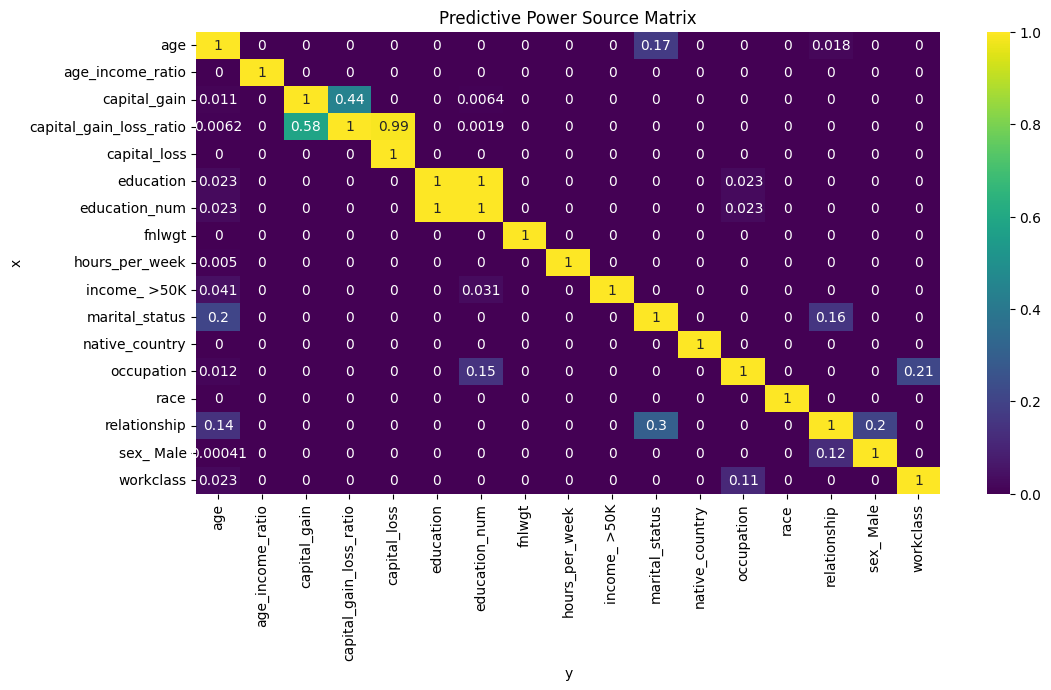

In [ ]:
# Plotting the PPS matrix
plt.figure(figsize=(12, 6))
sns.heatmap(PPS_matrix, annot=True, cmap='viridis')
plt.title('Predictive Power Source Matrix')
plt.show()

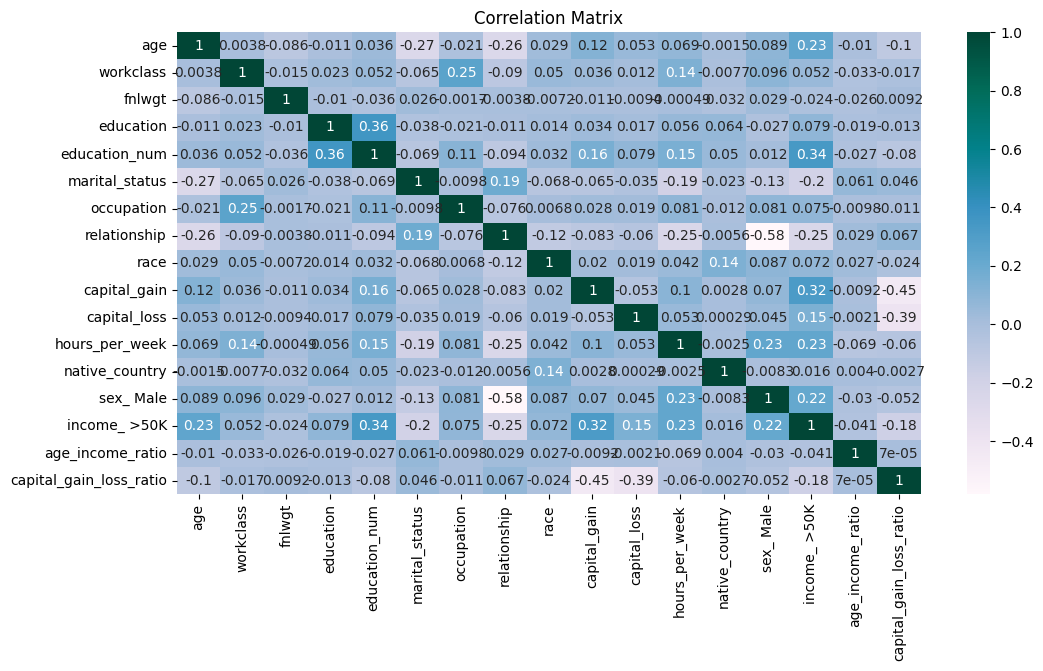

In [ ]:
# Plotting the correlation matrix
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='PuBuGn')
plt.title('Correlation Matrix')
plt.show()